# **Projeto modelo de regressão logística - Doenças cardiovasculares.**

## **Objetivo:**
criação de um modelo que auxilie prever doenças cardiovasculares, utilizando dados históricos dos pacientes e indicando se novos pacientes estão propensos a doenças cariovasculares ou não.

## **Contexto:**
A base de dados utilizada neste projeto contém informações históricas de pacientes, incluindo dados demográficos e indicadores de saúde.

O modelo proposto atua como uma ferramenta de apoio à decisão, auxiliando na priorização de pacientes para acompanhamento e exames preventivos. Ao antecipar cenários de maior risco, é possível direcionar recursos de forma mais eficiente e reduzir a incidência de complicações graves.

Dessa forma, o uso do modelo impacta diretamente a tomada de decisão clínica, contribuindo para a detecção precoce, a melhoria dos desfechos de saúde e a otimização dos recursos disponíveis.

## **Base de dados:**

a base contém os seguintes dados:

**age** - idade dos pacientes.

**gender** - genero (2 para mulheres) (1 para homens)

**height** - altura dos pacientes

**weight** - peso dos pacientes

**cholesterol** - colesterol normal (1), acima do normal (2), muito acima do normal (3)

**gluc** - glicose normal (1), acima do normal (2), muito acima do normal (3)

**smoke** - fumante (1). não fumante (0)

**alco** - consome alcool (1) não consome (0)

**active** - realiza atividades fisicas (1) não realiza (0)

**cardio_disease** - tem doença cardio (1) não tem (0) - (Variável alvo)

## **Bibliotecas utilizadas**
**- pandas** para manipulação e análise de dados.

**- numpy** para operações numéricas.

**- matplotlib e seaborn** para visualização de gráficos e análise exploratória de dados.

**- standartScaler e SMOTE** para preparação, padronização e balanceamento dos dados.

**- train_test_split** para separação dos dados em conjuntos de treino e teste.

**- logisticRegression** para modelagem.

### **Bibliotecas da etapa de avaliação do modelo (métricas):**
**- confusion_matrix** para análise de previsões.

**- accuracy_score** como métrica inicial de desempenho.

**- classification_report** para análise detalhada de precisão, recall e F1-score.

**- roc_curve e roc_auc_score** para avaliação da capacidade discriminatória do modelo por meio da curva ROC e da métrica AUC.

In [36]:
# importação das bibliotecas 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, classification_report

## **Análise exploratória inicial e avaliação da qualidade dos dados**

In [2]:
# carregando a base de dados
base = pd.read_csv(r"CARDIO_BASE.csv", delimiter=';')

base

,age,gender,height,weight,cholesterol,gluc,smoke,alco,active,cardio_disease
0,50,2,168,62,1,1,0,0,1,0
1,55,1,156,85,3,1,0,0,1,1
2,52,1,165,64,3,1,0,0,0,1
3,48,2,169,82,1,1,0,0,1,1
4,48,1,156,56,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,56,1,166,65,1,1,0,0,0,0
9996,50,1,160,93,2,1,0,0,1,1
9997,40,1,158,66,2,2,0,0,1,0
9998,50,1,168,70,3,1,0,0,1,1


In [3]:
# explorando a base de dados
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             10000 non-null  int64 
 1   gender          10000 non-null  int64 
 2   height          10000 non-null  int64 
 3   weight          10000 non-null  object
 4   cholesterol     10000 non-null  int64 
 5   gluc            10000 non-null  int64 
 6   smoke           10000 non-null  int64 
 7   alco            10000 non-null  int64 
 8   active          10000 non-null  int64 
 9   cardio_disease  10000 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 781.4+ KB


a base analisada contém: **10 mil linhas** e **10 variáveis explicativas**.

todas as variáveis estão classificadas como numéricas, com excessão da variável **weight** que está classificada como: **object**, indicando a necessidade de tratamento.

não foram identificados valores nulos na base de dados.

a variável alvo **cardio_disease** é binária codificada numericamente, caracterizando um modelo de classificação.

## Padronização e tratamento da variável **"weight":**

In [4]:
# padronização da coluna
base['weight'] = (
    base['weight']
    .str.strip()              # remove possíveis espaços
    .str.replace(',', '.', regex=False)  # substitui vírgula por ponto como separador de milhar
    .str.replace('kg', '', regex=False)  # remove possíveis sufixos
)

In [5]:
# alterando tipagem para numérica
base['weight'] = pd.to_numeric(base['weight'], errors='coerce')

## Validação

In [6]:
# conferindo a tipagem das variáveis após a conversão
base.dtypes

age                 int64
gender              int64
height              int64
weight            float64
cholesterol         int64
gluc                int64
smoke               int64
alco                int64
active              int64
cardio_disease      int64
dtype: object

A variável **weight**, inicialmente classificada como **object**, foi convertida para formato numérico para garantir consistência estrutural da base.

In [7]:
# análise estatística das variáveis contínuas
variaveis_continuas = [
    'age',
    'height',
    'weight'
]

base[variaveis_continuas].describe()

,age,height,weight
count,10000.000000,10000.000000,10000.000000
mean,53.288300,164.308200,74.303710
std,6.796234,8.178796,14.566353
min,30.000000,70.000000,30.000000
25%,48.000000,159.000000,65.000000
50%,54.000000,165.000000,72.000000
75%,58.000000,170.000000,82.000000
max,65.000000,250.000000,200.000000


## Verificação de Outliers

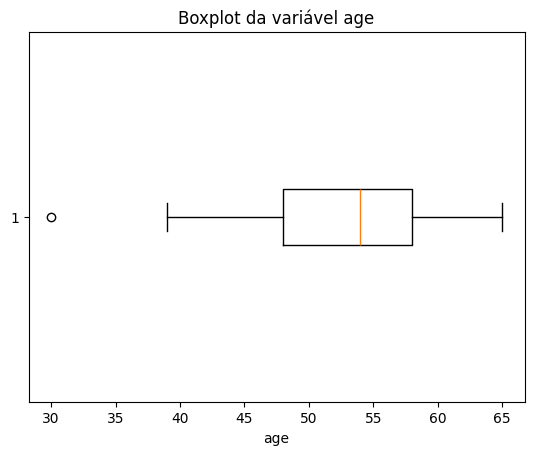

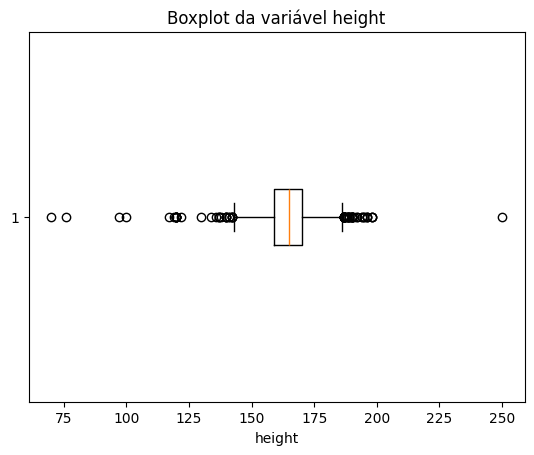

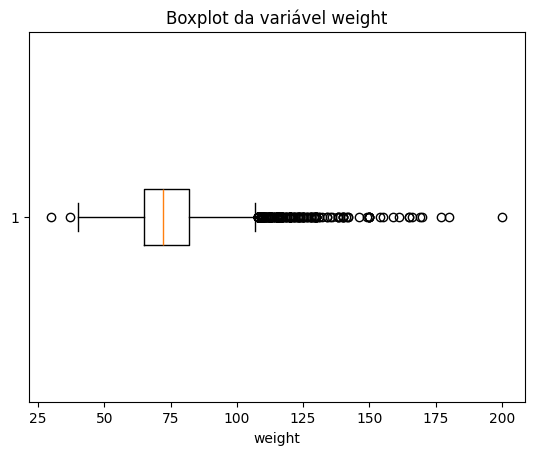

In [8]:
# visualizando possíveis outliers através do gráfico de caixa
for col in variaveis_continuas:
    plt.figure()
    plt.boxplot(base[col], vert=False)          # gráfico na horizontal
    plt.title(f'Boxplot da variável {col}')
    plt.xlabel(col)

    plt.show()

In [9]:
# método interquartil (IQR)
outliers_iqr = {}

for col in variaveis_continuas:
    Q1 = base[col].quantile(0.25)
    Q3 = base[col].quantile(0.75)
    IQR = Q3 - Q1
    
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    outliers = base[(base[col] < limite_inferior) | (base[col] > limite_superior)]
    
    outliers_iqr[col] = {
        'qtd_outliers': outliers.shape[0],
        'limite_inferior': limite_inferior,
        'limite_superior': limite_superior,
        
    }

outliers_iqr

{'age': {'qtd_outliers': 1,
  'limite_inferior': np.float64(33.0),
  'limite_superior': np.float64(73.0)},
 'height': {'qtd_outliers': 74,
  'limite_inferior': np.float64(142.5),
  'limite_superior': np.float64(186.5)},
 'weight': {'qtd_outliers': 247,
  'limite_inferior': np.float64(39.5),
  'limite_superior': np.float64(107.5)}}

## Análise dos outliers:
- variável **idade** possui **1** outlier, indicando baixo risco para o modelo, pois não indica problema estrutural.

- variável **altura** possui **74** outliers, indicando possíveis erros de digitação (coleta).

- variável **peso** possui **247** outliers. É comum em saúde que essa variável tenha distribuição naturalmente assimétrica.

As variáveis **age** e **weight** terão os dados mantidos, pois são números clinicamente plausíveis. A variável **height**, porém, necessita de tratamento pois são números altamente improváveis e, portanto, não representam indivíduos reais do contexto do problema.

## Tratamento dos outliers da variável **height** (altura)

In [10]:
# transformando outliers em ausentes
base.loc[(base['height'] < 142.5) | (base['height'] > 186.5), 'height'] = np.nan

os limites de detecção de outliers foram derivados a partir do método do intervalo interquartil (IQR)

In [11]:
# imputando pela mediana
altura_mediana = base['height'].median()

base['height'] = base['height'].fillna(altura_mediana)

altura_mediana

np.float64(165.0)

para preservar o volume amostral e evitar perda de informação, os registros com valores incompatíveis com a população adulta foram tratados como ausentes e imputados pela mediana da variável (165 cm), uma vez que a distribuição apresentou média e mediana muito próximas, indicando baixa assimetria.

## Validação

In [12]:
# comparando estatísticas descritivas
base['height'].describe()

count    10000.000000
mean       164.314900
std          7.591054
min        143.000000
25%        159.000000
50%        165.000000
75%        169.000000
max        186.000000
Name: height, dtype: float64

após imputação, nem a média ou mediana, nem o desvio padrão tiveram alterações significativas e os valores mínimo e máximo continuam plausíveis.

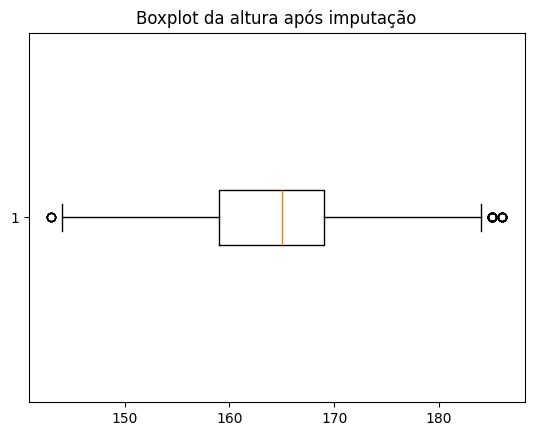

In [13]:
# analisando gráfico de caixa pós-imputação
plt.boxplot(base['height'], vert=False)
plt.title('Boxplot da altura após imputação')
plt.show()

Gráfico com menos extremos improváveis, caixa estável e limites coerentes.

## **Análise das variáveis e hipóteses iniciais**

### hipótese 1: a média de idade é maior na categoria que possui doença cardiovascular?

In [14]:
# agrupando idade pela variável alvo
base.groupby('cardio_disease')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
cardio_disease,,,,,,,,
0,4969.0,51.667136,6.836329,30.0,46.0,52.0,57.0,65.0
1,5031.0,54.889485,6.363767,39.0,50.0,56.0,60.0,65.0


<Figure size 640x480 with 0 Axes>

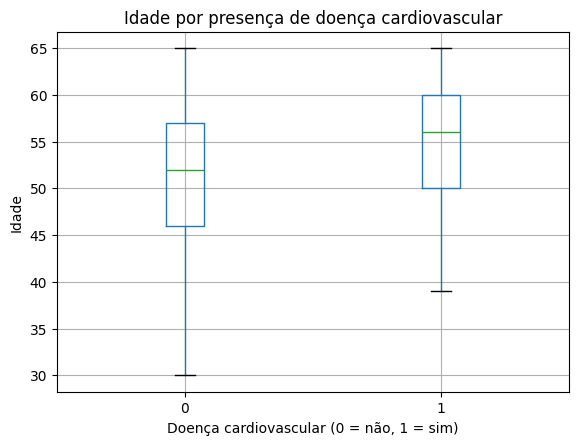

In [15]:
# gráfico de caixa por categoria

plt.figure()
base.boxplot(column='age', by='cardio_disease')
plt.title('Idade por presença de doença cardiovascular')
plt.suptitle('')
plt.xlabel('Doença cardiovascular (0 = não, 1 = sim)')
plt.ylabel('Idade')
plt.show()

A análise idade x variável alvo indica que indivíduos com doença cardiovascular apresentam idade média e mediana superiores aos indivíduos sem a condição, com deslocamento consistente da distribuição. 

Embora a diferença entre as classes não seja enorme, a idade atua como um importante fator de risco e deve exercer influência positiva na probabilidade estimada pelo modelo.

### hipótese 2: indivíduos com sobrepeso são mais propensos a ter doenças cardiovasculares?

In [16]:
# agrupando peso pela variável alvo
base.groupby('cardio_disease')['weight'].describe()

,count,mean,std,min,25%,50%,75%,max
cardio_disease,,,,,,,,
0,4969.0,71.616865,13.342960,30.0,63.0,70.0,79.0,200.0
1,5031.0,76.957444,15.223951,40.0,66.0,75.0,85.0,180.0


<Figure size 640x480 with 0 Axes>

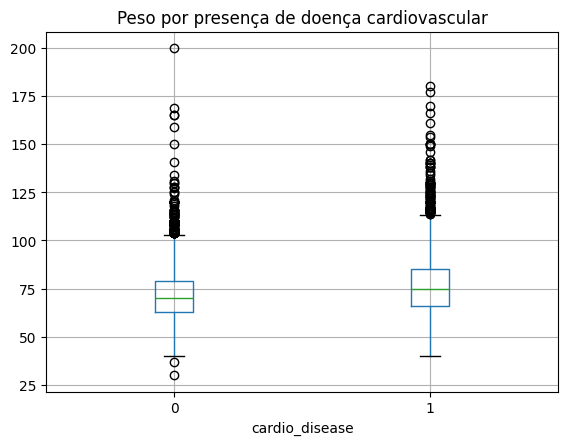

In [17]:
# gráfico de caixa: peso x variável alvo
plt.figure()
base.boxplot(column='weight', by='cardio_disease')
plt.title('Peso por presença de doença cardiovascular')
plt.suptitle('')
plt.show()

nesse contexto, os outliers da variável peso são um perfil clínico relevante, não é erro.

peso não separa bem as classes, embora seja um fator de risco moderado. Portanto deve contribuir para o modelo em conjunto com outras variáveis.

### hipótese 3: indivíduos fisicamente ativos têm menor probabilidade de ter doença cardiovascular?

In [18]:
# tabela cruzada de proporções: atividade física x variável alvo
ativ_x_doenca = pd.crosstab(
    base['active'], 
    base['cardio_disease'],
    normalize='index'
)

ativ_x_doenca

cardio_disease,0,1
active,,
0,0.458087,0.541913
1,0.506774,0.493226


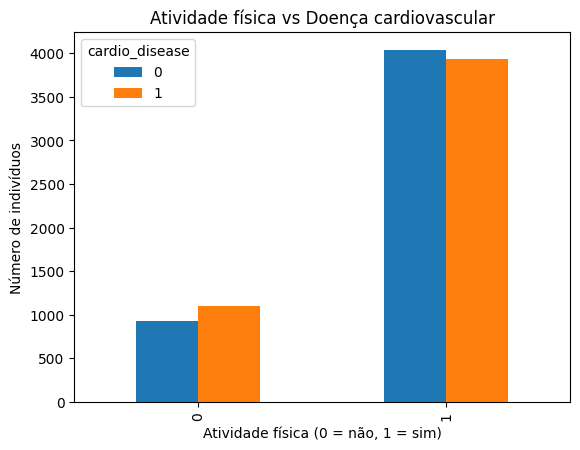

In [19]:
# gráfico de barras entre as classes
pd.crosstab(base['active'], base['cardio_disease']).plot(kind='bar')
plt.title('Atividade física vs Doença cardiovascular')
plt.xlabel('Atividade física (0 = não, 1 = sim)')
plt.ylabel('Número de indivíduos')
plt.show()

indivíduos que fazem atividade física têm menor percentual de doença cardiovascular

embora a diferença entre classes seja moderada, o padrão é consistente e confiável para o modelo.

### hipótese 4: fumantes têm maior probabilidade de apresentar doença cardiovascular? 

In [20]:
# Tabela cruzada de proporções
fum_x_doenca = pd.crosstab(
    base['smoke'],
    base['cardio_disease'],
    normalize='index'
)

fum_x_doenca

cardio_disease,0,1
smoke,,
0,0.494072,0.505928
1,0.525843,0.474157


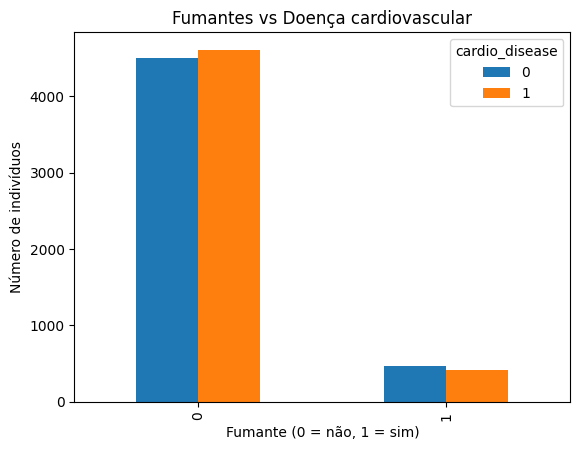

In [21]:
# gráfico de barras: fumantes x variável alvo
pd.crosstab(base['smoke'], base['cardio_disease']).plot(kind='bar')
plt.title('Fumantes vs Doença cardiovascular')
plt.xlabel('Fumante (0 = não, 1 = sim)')
plt.ylabel('Número de indivíduos')
plt.show()

nesta base, fumantes apresentam ligeiramente menor proporção de doenças cardiovasculares (~47%) em comparação com não fumantes (~50%), contrariando a hipótese de que fumar aumentaria o risco. 

Embora a diferença seja pequena, a variável *smoke* ainda pode fornecer informação relevante quando combinada com outros preditores no modelo.

### hipótese 5: indivíduos com colesterol muito alto apresentam maior probabilidade de doença cardiovascular?

In [22]:
# Tabela cruzada de proporções
colesterol_x_doenca = pd.crosstab(
    base['cholesterol'],
    base['cardio_disease'],
    normalize='index'
)
colesterol_x_doenca

cardio_disease,0,1
cholesterol,,
1,0.554561,0.445439
2,0.414244,0.585756
3,0.217238,0.782762


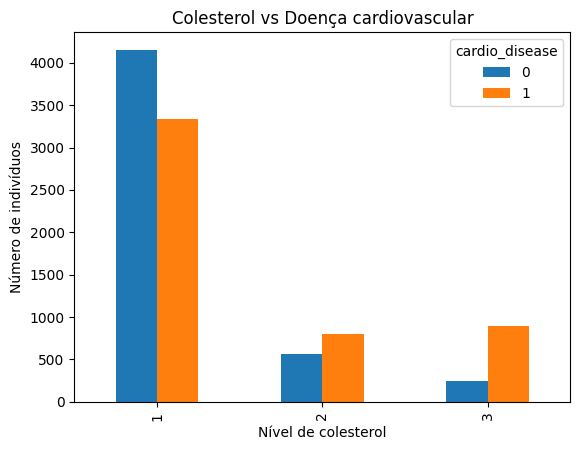

In [23]:
# Visualização através de um gráfico de barras
pd.crosstab(base['cholesterol'], base['cardio_disease']).plot(kind='bar')
plt.title('Colesterol vs Doença cardiovascular')
plt.xlabel('Nível de colesterol')
plt.ylabel('Número de indivíduos')
plt.show()

quanto maior o nível de colesterol, maior a proporção de indivíduos com doença cardiovascular, indicando um forte indicador de risco.

O padrão crescente é consistente, com forte potencial explicativo no modelo de regressão logística.”

## **matriz de correlação**

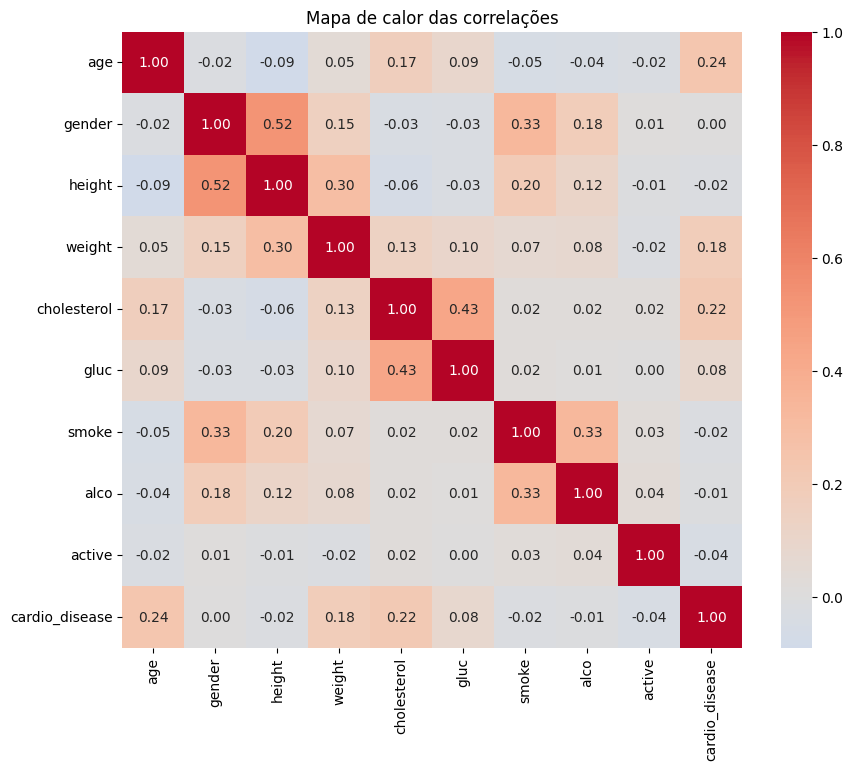

In [24]:
# aplicando às variáveis da base de dados
corr = base.corr()

# Visualizando o mapa de calor da correlação com destaque para a variável alvo
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Mapa de calor das correlações")
plt.show()

### **insights:**

a **variável alvo** possui correlação positiva moderada com as variáveis **colesterol**, **idade** e **peso**: colesterol alto se mostra fator relevante, assim como pessoas mais velhas têm maior risco de doença cardiovascular, e pessoas com maior peso têm maior risco também.

as variáveis **gênero, altura, glicose, fumantes, álcool e atividade física** possuem quase nenhuma correlação com a variável alvo, sendo pouco influentes se isolados.

## **Separação da base de dados em treino e teste**

In [25]:
# Separando em X (variáveis de entrada) e y (variável de saída)
X = base.drop('cardio_disease', axis=1)  # X contém todas as colunas exceto 'cardio_disease'
y = base['cardio_disease']  # y contém apenas a coluna 'cardio_disease'

In [26]:
# dividindo a base em treino e teste (usando 80% para treino e 20% para teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# **Padronização das variáveis**

em algorítimos como a regressão logística, a padronização pode ajudar na convergência mais rápida durante o treinamento. Além disso, o modelo funciona melhor quando as características estão na mesma escala.

In [27]:
# Inicializando StandardScaler
scaler = StandardScaler()

# ajustando e transformando apenas no treino
numerical_cols = ['age', 'height', 'weight', 'cholesterol', 'gluc']  # colunas contínuas

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()


X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# Transformar teste usando o mesmo scaler aprendido
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])

## Verificação do balanceamento dos dados da variável alvo

In [28]:
# quantidade de registros em cada classe
base['cardio_disease'].value_counts()

cardio_disease
1    5031
0    4969
Name: count, dtype: int64

- classe que possui doença cardiovascular possui **5.031 registros**

- classe que não possui doença cardiovascular possui **4.969 registros**

## **Balanceamento dos dados da variável alvo**

In [29]:
# Balanceando os dados de treinamento usando SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

### validação pós balanceamento dos dados:

In [30]:
print("Distribuição após SMOTE (treino):")
print(y_train_balanced.value_counts())

Distribuição após SMOTE (treino):
cardio_disease
1    4025
0    4025
Name: count, dtype: int64


as duas classes possuem o mesmo número de registros: **4.025** .

## **Verificação e visualização das bases**

In [31]:
# Checando algumas linhas
print("Exemplo X_train_balanced:")
display(X_train_balanced.head())

print("\nExemplo X_test_scaled:")
display(X_test_scaled.head())

# Dimensões finais
print("\nDimensões finais:")
print("X_train_balanced:", X_train_balanced.shape)
print("y_train_balanced:", y_train_balanced.shape)
print("X_test_scaled:", X_test_scaled.shape)
print("y_test:", y_test.shape)

Exemplo X_train_balanced:


,age,gender,height,weight,cholesterol,gluc,smoke,alco,active
0,-0.191322,1,0.748193,-0.300949,-0.5425,-0.394734,0,0,1
1,-0.485891,2,1.409024,-0.506056,-0.5425,-0.394734,0,1,1
2,-0.485891,1,-0.573469,-0.027472,-0.5425,-0.394734,0,0,1
3,-1.075027,2,-0.837802,-0.506056,-0.5425,-0.394734,1,1,1
4,0.692383,2,1.276858,-0.300949,-0.5425,1.372402,0,0,0



Exemplo X_test_scaled:


,age,gender,height,weight,cholesterol,gluc,smoke,alco,active
5251,-0.191322,2,1.673357,-0.095841,-0.5425,-0.394734,1,1,1
8436,0.986951,1,0.483861,-0.437687,-0.5425,-0.394734,0,0,0
3599,-0.485891,1,-1.762965,-0.779533,-0.5425,-0.394734,0,0,1
9308,0.839667,2,2.069855,1.066436,-0.5425,-0.394734,0,0,1
413,1.428804,1,-1.102134,-1.326487,-0.5425,-0.394734,0,0,1



Dimensões finais:
X_train_balanced: (8050, 9)
y_train_balanced: (8050,)
X_test_scaled: (2000, 9)
y_test: (2000,)


## **Treinamento do modelo - Aplicação da regressão logística**

In [32]:
logreg = LogisticRegression(random_state =42, max_iter=1000)
# adicionando max_iter = 1.000. Ele controla o número máximo de vezes que o algoritmo itera sobre o conjunto de dados para encontrar os melhores coeficientes.

logreg.fit(X_train_balanced, y_train_balanced)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multi

## Métricas: Intercept e coeficientes resultantes do treinamento

In [ ]:
logreg.intercept_       # intercept serve como ponto de partida da equação da regressão logística

array([0.12609263])

**Intercept : 12,5%** , representa o valor do log-odds, considerando todas as variáveis sendo 0.

In [ ]:
logreg.coef_        # efeito da variável no log-odds, considerando as demais constantes

array([[ 0.43348092,  0.04075488, -0.11030943,  0.38014007,  0.41004778,
        -0.06832563, -0.06992853, -0.03799171, -0.19659189]])

## **Avaliação das métricas de treinamento**

In [35]:
# Criação dataframe com variáveis e coeficientes
coef_df = pd.DataFrame({
    "Variável": X_train_scaled.columns,
    "Coeficiente": logreg.coef_[0]
})

# Adicionando interpretação do efeito
coef_df["Efeito no risco"] = np.where(coef_df["Coeficiente"] > 0, "+ risco", "- risco")

# Ordenando por magnitude absoluta do coeficiente
coef_df["Magnitude"] = coef_df["Coeficiente"].abs()
coef_df = coef_df.sort_values(by="Magnitude", ascending=False).drop(columns="Magnitude")

coef_df.reset_index(drop=True, inplace=True)

coef_df

,Variável,Coeficiente,Efeito no risco
0,age,0.433481,+ risco
1,cholesterol,0.410048,+ risco
2,weight,0.380140,+ risco
3,active,-0.196592,- risco
4,height,-0.110309,- risco
5,smoke,-0.069929,- risco
6,gluc,-0.068326,- risco
7,gender,0.040755,+ risco
8,alco,-0.037992,- risco


variáveis positivas: **idade, colesterol, peso e gênero** aumentam a probabilidade de doenças cardiovasculares. Quanto maior o coeficiente, maior a influência sobre a decisão do modelo.

variáveis negativas: **atividade, altura, fumante, glicose e álcool** diminuem a probabilidade do evento ocorrer, portanto, possuem menor influência sobre a decisão do modelo.

## Avaliação das previsões na base de treinamento

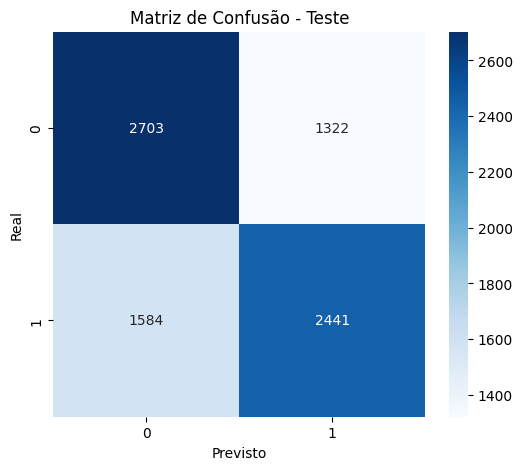

In [37]:
# Previsões no conjunto de treino
previsoes = logreg.predict(X_train_balanced)

# Matriz de Confusão
cm = confusion_matrix(y_train_balanced, previsoes)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Teste")
plt.show()

**2.703 registros** verdadeiro negativos (TN) - o modelo acertou que não tem doença.

**1.322** falso positivos (FP) - o modelo errou que tinha doença, mas nao tinha.

**1.584** falso negativos (FN) - o modelo errou que não tinha doença, porém tinha. **(erro mais crítico)**

**2.441** verdadeiro positivos (TP) - o modelo acertou que tinha doença.

In [38]:
# Relatório de Classificação
print("Classification Report:")
print(classification_report(y_train_balanced, previsoes))

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.67      0.65      4025
           1       0.65      0.61      0.63      4025

    accuracy                           0.64      8050
   macro avg       0.64      0.64      0.64      8050
weighted avg       0.64      0.64      0.64      8050



**64% de acurácia** - percentual de registros que o modelo acertou.

**61% de recall da classe positiva** - percentual de acertos da classe positiva.

**65% de precisão da classe positiva** - percentual de registros em que o modelo acertou que tinha doença.

**63% de F1-score** - percentual equilibrado das métricas: recall e precisão.

## **conclusões da etapa de treinamento**

o modelo possui mais registros de acertos que de erros, porém o modelo perde muitos pacientes doentes **(1.584 falso negativos)**, sendo necessária atenção nesse ponto.

o balanceamento dos dados de treinamento ajudou, pois o modelo aprende padrões de ambas as classes.

# **Teste do modelo**

In [39]:
# iniciando teste de previsões
y_pred_test = logreg.predict(X_test_scaled)

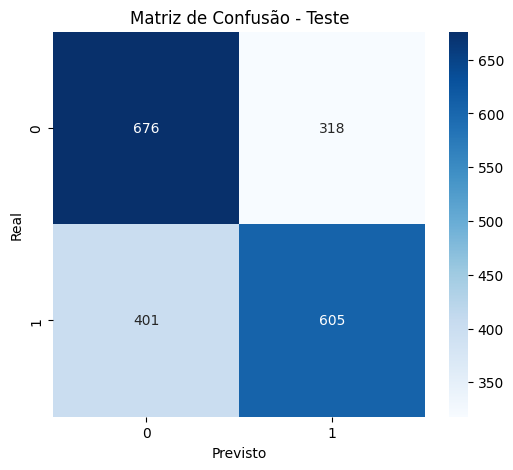

In [40]:
# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Teste")
plt.show()

**676 registros** verdadeiro negativos (TN) - o modelo acertou que não tem doença.

**318** falso positivos (FP) - o modelo errou que tinha doença, mas nao tinha.

**401** falso negativos (FN) - o modelo errou que não tinha doença, porém tinha. **(erro mais crítico)**

**605** verdadeiro positivos (TP) - o modelo acertou que tinha doença.

In [41]:
relatorio = classification_report(y_test, y_pred_test)
print("Relatório de Classificação:")
print(relatorio)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.63      0.68      0.65       994
           1       0.66      0.60      0.63      1006

    accuracy                           0.64      2000
   macro avg       0.64      0.64      0.64      2000
weighted avg       0.64      0.64      0.64      2000



**permaneceu 64% de acurácia** - percentual de registros que o modelo acertou no teste.

**leve redução para 60% de recall da classe positiva** - percentual de acertos da classe positiva.

**leve aumento para 66% de precisão da classe positiva** - percentual de registros em que o modelo acertou que tinha doença.

**permaneceu 63% de F1-score** - percentual equilibrado das métricas: recall e precisão.

# **Curva AUC - ROC**

**AUC** é uma medida agregada do desempenho do modelo em todos os limiares possíveis e representa o grau de separação.

**ROC** traça a taxa de recall contra a taxa de falso positivos em vários limiares da decisão e é uma curva de probabilidade.

In [42]:
# probabilidade da classe positiva
y_proba_test = logreg.predict_proba(X_test_scaled)[:, 1]

# inicializando a curva roc
fpr, tpr, thresholds = roc_curve(y_test, y_proba_test)

# Calculando a AUC
roc_auc = roc_auc_score(y_test, y_proba_test)
print(f"AUC: {roc_auc:.2f}")

AUC: 0.70


O modelo apresentou **AUC = 0.70**, indicando uma boa capacidade discriminativa, ou seja, o algoritmo consegue ranquear corretamente indivíduos positivos acima dos negativos em aproximadamente **70%** das comparações aleatórias. 

Esse resultado é considerado bom para dados tabulares reais e sensíveis, especialmente em um domínio onde ruído, variabilidade e desbalanceamento são comuns.

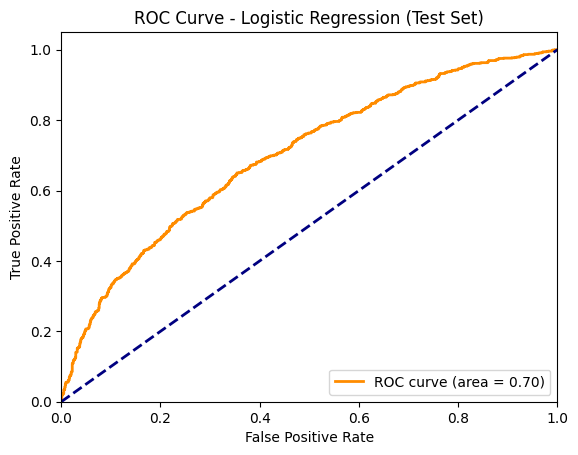

In [43]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)        # curva roc
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')                                # modelo aleatório
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression (Test Set)')
plt.legend(loc="lower right")
plt.show()

A curva ROC mostra que a taxa de sensibilidade do modelo de 60% não é um limite do modelo e sim um limite do limiar (threshold - 0.5)

O gráfico indica que o modelo ganha recall rapidamente com pouco aumento de FPR *(false positive rate)*, pois existe espaço claro para ajuste de threshold.

# **Complemento sobre o modelo do projeto**

### **O que é a regressão logística:**

A regressão logística é um modelo linear de aprendizado supervisionado.

### **Por que a regressão logística é um modelo de classificação:**

É um modelo de classificação, pois ela prevê categorias e não valores contínuos. Ela calcula a probabilidade de um evento ocorrer e então classifica o resultado, por exemplo, como 1 se a probabilidade for maior que 0,5.

### **Regressão logística x Regressão linear - pontos em comum:**

Ambas são modelos lineares, com mesmo tipo de equação, conceito de coeficientes e mesmo impacto das variáveis.

ambas usam coeficientes interpretáveis e, embora na regressão linear o impacto seja no valor previsto enquanto na regressão logística o impacto seja no log-odds, a lógica interpretativa é a mesma.

os dois modelos precisam de pré-processamento parecido, assim como podem sofrer underfitting e overfitting.

ambas são modelos paramétricos, por isso são rápidas, estáveis e ótimas como baseline.

Os dois modelos fazem aprendizado supervisionado, só muda o tipo de erro e a função de custo.

ambas são ótimas para explicabilidade, por isso muito usadas em saúde, finanças, risco e crédito, por exemplo.

# **Conclusões finais**

Neste projeto desenvolvemos e avaliamos um modelo de classificação binária aplicado a um contexto de saúde, com foco não apenas em desempenho preditivo, mas principalmente em interpretação, robustez metodológica e alinhamento com o problema de negócio.

O modelo apresentou uma boa capacidade discriminativa, indicando potencial de uso como ferramenta de apoio à decisão clínica, especialmente se combinado com ajuste de limiar para priorização de sensibilidade a ser realizado em etapas posteriores.

A curva ROC mostrou que o modelo apresenta ganho expressivo de sensibilidade com pequenos aumentos na taxa de falso positivo, isso é particularmente relevante em contextos clínicos, onde reduzir falsos negativos pode ser mais crítico do que minimizar falsos positivos.

A matriz de confusão evidenciou uma sensibilidade moderada para a classe positiva quando utilizado o limiar padrão (0.5), o que reforça que o desempenho observado não é uma limitação estrutural do modelo, mas sim uma decisão de threshold, passível de otimização conforme o cenário de uso.

Além do desempenho, foi dada atenção especial à interpretação do modelo, analisando coeficientes e intercepto, garantindo transparência e explicabilidade — fatores essenciais em aplicações na área da saúde e em ambientes regulados.

O modelo desenvolvido busca ter utilidade prática, interpretabilidade e aderência ao problema proposto.

Como próximos passos, destacam-se:

otimização do limiar de decisão com base no custo de erro.

engenharia de novas variáveis.

comparação com modelos mais complexos (ex.: árvores) mantendo o cuidado com interpretabilidade.